In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,confusion_matrix

**Importing the dataset**

In [4]:
dataset = pd.read_csv("Social_Network_Ads.csv")

In [5]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [6]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

**Feature Scaling**

In [9]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [28]:
# x_train.shape #280/400
y_test.shape #

(120,)

**Fitting K-NN to the Training set**

In [44]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

**Predicting the Test set results**

In [45]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

**Making the Confusion Matrix**

In [46]:
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)

Confusion Matrix:
[[62 10]
 [ 4 44]]


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90        72
           1       0.81      0.92      0.86        48

    accuracy                           0.88       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.89      0.88      0.88       120



In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8833333333333333

In [71]:
range_k =range(1,50)
scores ={}
scores_list =[]

In [72]:
for k in range_k:
   model1 = KNeighborsClassifier(n_neighbors=k)
   model1.fit(x_train, y_train)
   y_pred1 = model1.predict(x_test)
   scores[k] = accuracy_score(y_test,y_pred1)
   scores_list.append(accuracy_score(y_test,y_pred1))
result1 = confusion_matrix(y_test, y_pred1)

In [73]:
scores

{1: 0.8333333333333334,
 2: 0.825,
 3: 0.875,
 4: 0.8833333333333333,
 5: 0.875,
 6: 0.875,
 7: 0.8666666666666667,
 8: 0.8666666666666667,
 9: 0.8666666666666667,
 10: 0.8666666666666667,
 11: 0.8666666666666667,
 12: 0.8666666666666667,
 13: 0.8666666666666667,
 14: 0.85,
 15: 0.8666666666666667,
 16: 0.8666666666666667,
 17: 0.8666666666666667,
 18: 0.8833333333333333,
 19: 0.8833333333333333,
 20: 0.8666666666666667,
 21: 0.8666666666666667,
 22: 0.8666666666666667,
 23: 0.8666666666666667,
 24: 0.8666666666666667,
 25: 0.8666666666666667,
 26: 0.8666666666666667,
 27: 0.8666666666666667,
 28: 0.8583333333333333,
 29: 0.8583333333333333,
 30: 0.85,
 31: 0.85,
 32: 0.85,
 33: 0.85,
 34: 0.85,
 35: 0.85,
 36: 0.85,
 37: 0.85,
 38: 0.8333333333333334,
 39: 0.8333333333333334,
 40: 0.8416666666666667,
 41: 0.85,
 42: 0.8416666666666667,
 43: 0.8666666666666667,
 44: 0.8583333333333333,
 45: 0.85,
 46: 0.8416666666666667,
 47: 0.8333333333333334,
 48: 0.8416666666666667,
 49: 0.85}

In [43]:
scores_list[3]

0.8833333333333333

In [ ]:
K_neighbours = 4 performs well

Text(0, 0.5, 'Accuracy')

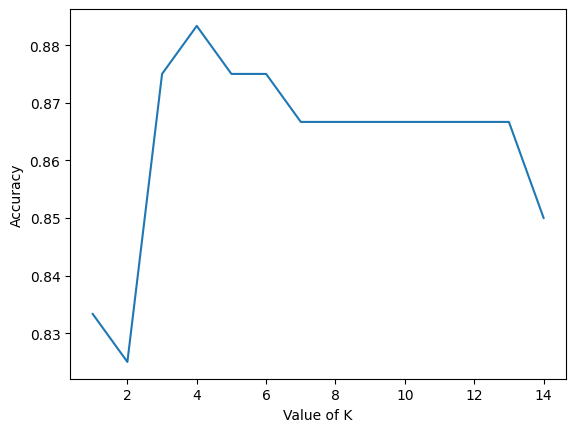

In [66]:
import matplotlib.pyplot as plt
plt.plot(scores.keys(),scores.values())
plt.xlabel("Value of K")
plt.ylabel("Accuracy")